In [1]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GRU import GRU
from MLP import MLP

In [2]:
def generate_timeseries(batch_size, n_steps):
    f1, f2, offset1, offset2 = np.random.rand(4, batch_size,1)
    t = np.linspace(0,1, n_steps)
    series = 0.5*np.sin((t - offset1)*(f1*10 + 10))
    series += 0.2*np.sin((t - offset2)*(f2*20 + 20))
    series += 0.1*(np.random.randn(batch_size, n_steps) - 0.5)
    
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 64
series = generate_timeseries(10000, n_steps + 1)

X_train , y_train = series[0:7000, :n_steps], series[0:7000, -1]
X_val , y_val = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [4]:
X_train.shape

(7000, 64, 1)

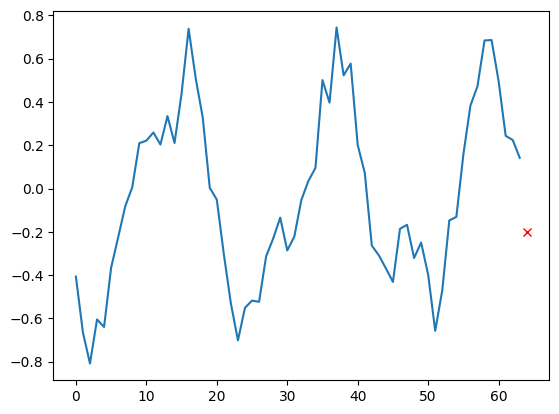

In [5]:
idx = np.random.randint(X_train.shape[0])
plt.plot(X_train[idx,:,:])
plt.plot(64, y_train[idx], marker='x',color='r')

In [6]:
def RMSE(preds, labels):
    return np.sqrt(np.mean((preds-labels)**2))

In [7]:
y_preds = X_train[:,-1,:]

In [8]:
RMSE(y_preds, y_train)

0.17898719

In [9]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [10]:
train_data[0][0].size()

torch.Size([64, 1])

In [11]:
model = MLP(n_steps, [64,32], 1).to('cpu')

In [12]:
model.fit(train_data, val_data, learning_rate = 3e-3, batch_size = 64)

Epoch	 Train Loss	 Val Loss	 Val RMSE
1	 3.639	 0.605	 0.14
2	 1.997	 0.630	 0.14
3	 1.933	 0.580	 0.13
4	 1.861	 0.570	 0.13
5	 1.802	 0.630	 0.14
6	 1.775	 0.639	 0.14
7	 1.715	 0.572	 0.13
8	 1.724	 0.549	 0.13
9	 1.729	 0.531	 0.13
10	 1.676	 0.579	 0.13
11	 1.652	 0.573	 0.13
12	 1.614	 0.571	 0.13
13	 1.620	 0.546	 0.13
14	 1.591	 0.573	 0.13
15	 1.611	 0.578	 0.13
16	 1.573	 0.549	 0.13
17	 1.538	 0.587	 0.14
18	 1.587	 0.547	 0.13
19	 1.532	 0.544	 0.13
20	 1.538	 0.553	 0.13
21	 1.489	 0.561	 0.13
22	 1.476	 0.532	 0.13
23	 1.483	 0.550	 0.13
24	 1.476	 0.537	 0.13
25	 1.468	 0.543	 0.13
26	 1.467	 0.533	 0.13
27	 1.400	 0.588	 0.14
28	 1.393	 0.563	 0.13
29	 1.386	 0.560	 0.13
30	 1.355	 0.551	 0.13
31	 1.361	 0.545	 0.13
32	 1.370	 0.561	 0.13
33	 1.323	 0.574	 0.13
34	 1.305	 0.553	 0.13
35	 1.276	 0.578	 0.13
36	 1.268	 0.570	 0.13
37	 1.283	 0.544	 0.13
38	 1.250	 0.571	 0.13
39	 1.243	 0.560	 0.13
40	 1.246	 0.551	 0.13
41	 1.210	 0.585	 0.14
42	 1.203	 0.558	 0.13
43	 1

In [13]:
model =  GRU(1,16,2,n_outputs=1)
model.fit(train_data,val_data, learning_rate = 3e-3, batch_size = 64)

Epoch	 Train Loss	 Val Loss	 Val RMSE
1	 5.233	 0.723	 0.15
2	 2.447	 0.718	 0.15
3	 2.390	 0.703	 0.15
4	 2.291	 0.703	 0.15
5	 2.308	 0.677	 0.15
6	 2.235	 0.654	 0.14
7	 2.192	 0.642	 0.14
8	 2.141	 0.641	 0.14
9	 2.150	 0.635	 0.14
10	 2.094	 0.627	 0.14
11	 2.074	 0.622	 0.14
12	 2.072	 0.621	 0.14
13	 2.066	 0.607	 0.14
14	 2.031	 0.595	 0.14
15	 2.023	 0.621	 0.14
16	 2.017	 0.613	 0.14
17	 1.999	 0.580	 0.13
18	 1.959	 0.575	 0.13
19	 1.936	 0.596	 0.14
20	 1.892	 0.546	 0.13
21	 1.875	 0.577	 0.13
22	 1.867	 0.567	 0.13
23	 1.827	 0.557	 0.13
24	 1.822	 0.553	 0.13
25	 1.828	 0.537	 0.13
26	 1.814	 0.585	 0.13
27	 1.797	 0.534	 0.13
28	 1.798	 0.551	 0.13
29	 1.779	 0.568	 0.13
30	 1.801	 0.548	 0.13
31	 1.808	 0.554	 0.13
32	 1.769	 0.540	 0.13
33	 1.788	 0.548	 0.13
34	 1.744	 0.516	 0.13
35	 1.689	 0.498	 0.12
36	 1.686	 0.487	 0.12
37	 1.662	 0.473	 0.12
38	 1.606	 0.470	 0.12
39	 1.563	 0.499	 0.12
40	 1.609	 0.451	 0.12
41	 1.549	 0.462	 0.12
42	 1.538	 0.439	 0.12
43	 1

In [14]:
model

GRU(
  (gru_layer): GRU(1, 16, num_layers=2, batch_first=True)
  (linear): Linear(in_features=16, out_features=1, bias=True)
)